# 5장

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/math4ds/blob/main/ch5
        .ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

예제 5-1

m = [1.93939394]
b = [4.73333333]


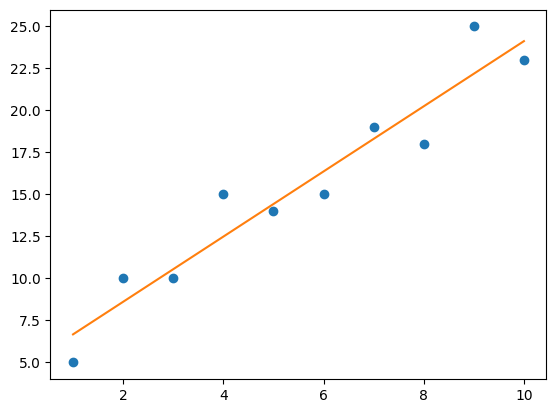

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터를 로드합니다
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 입력 변수를 추출합니다(마지막 열은 제외)
X = df.values[:, :-1]

# 출력 값(마지막 열)을 추출합니다
Y = df.values[:, -1]

# 이 데이터로 선형 회귀를 훈련합니다
model = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = model.coef_.flatten()
b = model.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# 그래프를 그립니다
plt.plot(X, Y, 'o') # 산점도
plt.plot(X, m*X+b) # 직선
plt.show()

예제 5-2

In [2]:
import pandas as pd

# 데이터 로드하기
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# 직선 방정식의 계수
m = 1.93939
b = 4.73333

# 잔차를 계산합니다
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


예제 5-4

In [3]:
import pandas as pd

# 데이터 로드하기
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# 직선 방정식의 계수
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# 제곱 합을 계산합니다
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

print("제곱 합 = {}".format(sum_of_squares))

제곱 합 = 28.096969704500005


예제 5-5

In [4]:
import pandas as pd

# 데이터를 로드합니다
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
    sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
    sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


예제 5-6

In [5]:
import pandas as pd
from numpy.linalg import inv
import numpy as np

# 데이터를 로드합니다
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 입력 변수를 추출합니다(마지막 열은 제외)
X = df.values[:, :-1].flatten()

# 절편(intercept)을 위해 "1"로 채워진 열을 추가합니다
X_1 = np.vstack([X, np.ones(len(X))]).T

# 출력 값(마지막 열)을 추출합니다
Y = df.values[:, -1]

# 기울기와 절편 계수를 계산합니다
beta = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(beta) # [1.93939394, 4.73333333]

# y 값을 예측합니다
y_predict = X_1.dot(beta)

[1.93939394 4.73333333]


예제 5-7

In [6]:
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# 데이터를 로드합니다
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# 입력 변수를 추출합니다(마지막 열은 제외)
X = df.values[:, :-1].flatten()

# 절편(intercept)을 위해 "1"로 채워진 열을 추가합니다
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# 출력 값(마지막 열)을 추출합니다
Y = df.values[:, -1]

# QR 분해를 사용해 기울기와 절편 계수를 계산합니다
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)

[1.93939394 4.73333333]


예제 5-8

In [7]:
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# 학습률
L = 0.001

# 경사 하강법을 수행할 반복 횟수
iterations = 100_000

 # 랜덤한 x에서 시작합니다
x = random.randint(-15,15)

for i in range(iterations):

    # 경사를 구합니다
    d_x = dx_f(x)

    # (learning rate) * (slope)를 빼서 x를 업데이트합니다
    x -= L * d_x

print(x, f(x))

3.000000000000111 4.0


예제 5-8

In [8]:
import pandas as pd

# CSV에서 데이터를 로드합니다
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# 계수를 초기화합니다
m = 0.0
b = 0.0

# 학습률
L = .001

# 반복 횟수
iterations = 100_000

n = float(len(points))  # X에 있는 원소 개수

# 경사 하강법 수행
for i in range(iterations):

    # m에 대한 그레이디언트
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

    # b에 대한 그레이디언트
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    # m과 b를 업데이트합니다
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


예제 5-10

In [9]:
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


예제 5-11

In [10]:
import pandas as pd
from sympy import *

# CSV에서 데이터를 로드합니다
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

# 계산 속도를 높이기 위해 lambdify로 컴파일합니다
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# 모델 계수를 초기화합니다
m = 0.0
b = 0.0

# 학습률
L = .001

# 반복 횟수
iterations = 100_000

# 경사 하강법을 수행합니다
for i in range(iterations):

    # m과 b를 업데이트합니다
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print("y = {0}x + {1}".format(m, b))

y = 1.939393939393954x + 4.733333333333231


예제 5-12

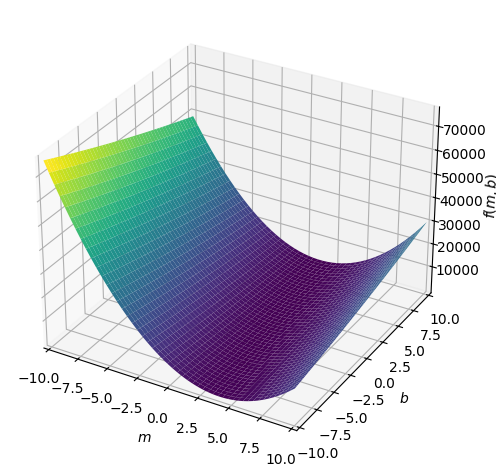

In [11]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)

예제 5-13

In [12]:
import pandas as pd
import numpy as np

# 데이터를 로드합니다
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]  # rows

# 계수를 초기화합니다
m = 0.0
b = 0.0

sample_size = 1  # 샘플 크기
L = .0001  # 학습률
epochs = 1_000_000  # 경사 하강법을 수행할 반복 횟수

# 확률적 경사 하강법을 수행합니다
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # 예측한 Y 값
    Y_pred = m * x_sample + b

    # m에 대한 그레이디언트
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    # b에 대한 그레이디언트
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b

    # 진행 과정 출력
    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

0 0.026600000000000002 0.0038
10000 2.400384397571111 1.8797105783914907
20000 2.198456083696196 2.8428689783983403
30000 2.121106184566772 3.476532062024638
40000 2.0348101161463226 3.915785948630591
50000 2.0125756066633316 4.203093048890449
60000 1.9643711732929399 4.3915290727121805
70000 1.9893572681362521 4.504512204794673
80000 1.95060291014922 4.596271231567738
90000 1.9279044969110097 4.632993611926271
100000 1.9586865761561514 4.665459345586608
110000 1.969735545947169 4.676346618356276
120000 1.9322142641248063 4.679717788138337
130000 1.934496599445899 4.71313463036307
140000 1.9381303461912598 4.723287683324555
150000 1.970151097090959 4.745476483941499
160000 1.9569288472213326 4.735791812069957
170000 1.9130550137618494 4.719968618230449
180000 1.921528636308805 4.7064310315239055
190000 1.9372937009020599 4.697110605091837
200000 1.932508490830255 4.705398015861345
210000 1.9429836513836352 4.725691001907893
220000 1.9305255717096346 4.734264637901676
230000 1.958828595

예제 5-14

In [13]:
import pandas as pd

# 데이터를 판다스 데이터프레임으로 로드하기
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# 변수 간의 상관계수 출력하기
correlations = df.corr(method='pearson')
print(correlations)

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


예제 5-15

In [14]:
import pandas as pd
from math import sqrt

# CSV에서 데이터 읽기
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * sum(p.y for p in points)

denominator = sqrt(n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
              * sqrt(n*sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator

print(corr)

0.9575860952087218


예제 5-16

In [15]:
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.2621571627409915


예제 5-17

In [16]:
from scipy.stats import t
from math import sqrt

# 샘플 크기
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# 데이터(https://bit.ly/2KF29Bd)에서 계산한 결정 계수
r = 0.957586

# 검정 수행
test_value = r / sqrt((1-r**2) / (n-2))

print("검정값: {}".format(test_value))
print("임계 범위: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("상관 관계가 입증되어 귀무 가설을 거부합니다")
else:
    print("상관 관계가 입증되지 않아 귀무 가설을 거부하지 못합니다")

# p 값 계산
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# 양측 검정이므로 2를 곱합니다
p_value = p_value * 2
print("P 값: {}".format(p_value))

검정값: 9.399564671312076
임계 범위: -2.262157162740992, 2.2621571627409915
상관 관계가 입증되어 귀무 가설을 거부합니다
P 값: 5.9763860877914965e-06


예제 5-18

In [17]:
import pandas as pd

# 판다스 데이터프레임으로 데이터 로드하기
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# 두 변수 사이의 결정 계수 출력하기
coeff_determination = df.corr(method='pearson') ** 2
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


예제 5-19

In [18]:
import pandas as pd
from math import sqrt

# 데이터를 로드합니다. 
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# 모델 파라미터를 초기화합니다. 
m = 1.939
b = 4.733

# 추정 표준 오차를 계산합니다. 
S_e = sqrt((sum((p.y - (m*p.x +b))**2 for p in points))/(n-2))

print(S_e)

1.87406793500129


예제 5-20

In [19]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# 데이터를 로드합니다. 
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# 모델 파라미터를 초기화합니다. 
m = 1.939
b = 4.733

# x = 8.5에 대한 예측 구간을 계산합니다.
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.462516875955465 25.966483124044537


예제 5-21

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 훈련 데이터와 테스트 데이터를 분할합니다.
# 데이터의 1/3을 테스트용으로 사용합니다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f" % result)

r^2: 0.992


예제 5-22

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 단순 선형 회귀를 수행합니다. 
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: 평균=%.3f (표준편차-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: 평균=0.993 (표준편차-0.000)


예제 5-23

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 단순 선형 회귀를 수행합니다. 
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("평균=%.3f (표준편차-%.3f)" % (results.mean(), results.std()))

[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
평균=0.769 (표준편차-0.208)


예제 5-24

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터를 로드합니다.
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")

# (마지막 열을 제외한 모든 열을) 입력 변수로 추출합니다.
X = df.values[:, :-1]

# 마지막 열을 출력으로 추출합니다.
Y = df.values[:, -1]

# 모델을 훈련합니다. 
fit = LinearRegression().fit(X, Y)

# 파라미터를 출력합니다.
print("계수 = {0}".format(fit.coef_))
print("절편 = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

계수 = [2.00672647 3.00203798]
절편 = 20.109432820035963
z = 20.109432820035963 + 2.006726472512807x + 3.0020379766466925y
